In [2]:
# %matplotlib notebook
%matplotlib inline
from scipy.stats import expon
import numpy as np
import seaborn

<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 2

En esta notebook trabajeremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{-0.01x} & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

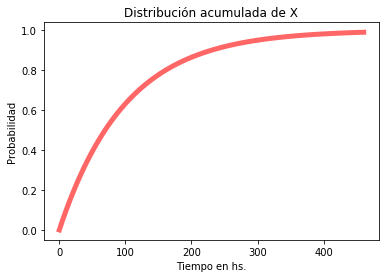

In [54]:
import matplotlib.pyplot as plt
scale = 1/0.01 # 1/lambda
x = np.linspace(expon.ppf(0.0, scale=scale), expon.ppf(0.99, scale=scale), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, expon.cdf(x, scale=scale), 'r-', lw=5, alpha=0.6)
ax.set_title('Distribución acumulada de X')
ax.set_xlabel('Tiempo en hs.')
ax.set_ylabel('Probabilidad')
ax.label_outer()

In [59]:
print('Probabilidad de que funcione entre 50 y 150 antes de descomponerse:')
expon.cdf(150, scale=scale) - expon.cdf(50, scale=scale)

Probabilidad de que funcione entre 50 y 150 antes de descomponerse:


0.38340049956420363

In [61]:
print('Probabilidad de que que una computadora se descomponga antes de registrar 100 horas de uso:')
1 - expon.cdf(100, scale=scale)

Probabilidad de que que una computadora se descomponga antes de registrar 100 horas de uso:


0.36787944117144233

## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal. Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.

In [66]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for normal distribution.
mu = 0
sigma = 10
rng = range(-20,30)

In [67]:
def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulutative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, normed=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 

Sample descriptive statistics:
                  0
count  10000.000000
mean      -0.071687
std       10.123136
min      -37.306405
25%       -7.041815
50%        0.026216
75%        6.854001
max       36.215967


/home/emanuel/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


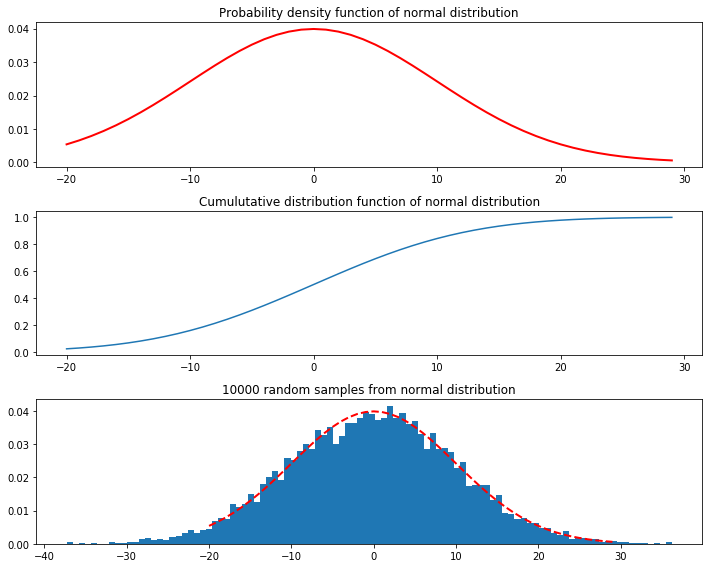

In [68]:
graphic_normal(mu, sigma, rng)

El parámetro **mu** de la distribución normal, también llamada la media, indica el corrimiento sobre el eje X de la campana de Gauss. Mientras que **sigma** indica la apertura de dicha campana: mientras mayor es sigma mas abierta (y aplastada) es la campana.